# Communication Graph

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import os
import glob
from urllib import parse
# from langdetect import detect
# import langid
import requests
import json
import pickle

In [8]:
import community
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
path = "../data/reddit_swiss_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))

dfs = pd.concat((pd.read_csv(f) for f in all_files))

In [55]:
dfs = dfs[dfs.num_comments != 0]

In [9]:
path = '../data'

comment_folder = glob.glob(os.path.join(path, "reddit_swiss_comments_*"))
comments_files = [glob.glob(os.path.join(folder, "part-*")) for folder in comment_folder]
    
for indx in range(len(comments_files)):
    dfc = pd.concat((pd.read_csv(f) for f in comments_files[indx]))

In [56]:
dfsc = dfs.merge(dfc, how='inner', left_on='name', right_on='link_id')

In [57]:
dfsc = dfsc[dfsc.author_x != dfsc.author_y]

In [58]:
len(dfsc)

15706

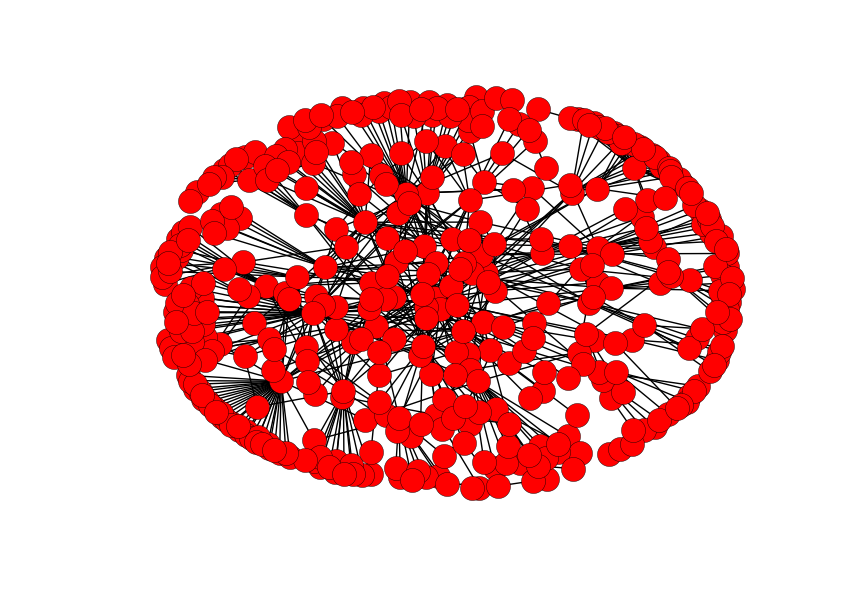

In [67]:
dfsc_tmp = dfsc[8000:9000]
len(dfsc_tmp)
edges = list(zip(dfsc_tmp['author_x'],dfsc_tmp['author_y']))
G1 = nx.Graph()
G1.add_edges_from(edges)
nx.draw(G1)

In [59]:
edges = list(zip(dfsc['author_x'],dfsc['author_y']))
G = nx.Graph()
G.add_edges_from(edges)

In [41]:
#compute the best partition
partition = community.best_partition(G)

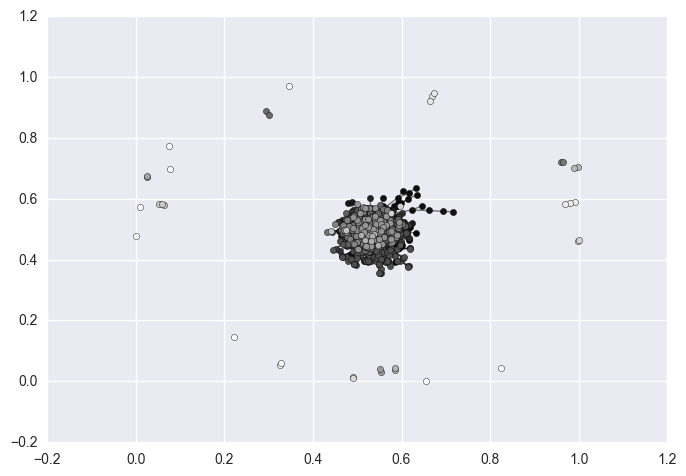

In [42]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()